# Ulwe Dataset-Customer Churn Prediction
# Machine Learning Assignment
## Solomon Amaning Odum


## Exploratory Data Analysis

In [59]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy.stats import linregress
from pandas.io.formats.info import DataFrameInfo
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]
pandas version: 1.3.5
matplotlib version: 3.2.2
NumPy version: 1.21.6
SciPy version: 1.7.3
IPython version: 7.9.0
scikit-learn version: 1.0.2
-------------------------


In [60]:
data=pd.read_csv("/content/drive/MyDrive/Ulwe dataset/Dataset (1).csv", index_col=[0])
data.head(5)


,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,...,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
10000,individual,4,0,31.0,333.0,31.980873,548.719449,364.0,580.700321,3163.351573,...,2999,700,-1.113238,2.801930,3.333333,1.5,6.864912,10K_to_20K,-3.221785,0
10001,individual,6,0,8.0,42.0,9.577651,43.988952,50.0,53.566603,3672.746526,...,2999,700,-2.032090,1.600223,5.550000,3.0,3.985185,10K_to_20K,-4.916200,0
10002,individual,8,1,13.0,0.0,15.368591,0.000000,13.0,15.368591,4712.106937,...,500,120,-2.350133,0.782016,4.571429,1.0,15.338890,20K_to_30K,4.455835,0
10003,individual,7,0,20.0,38.0,21.091508,52.044282,58.0,73.135790,11356.222392,...,500,120,2.366904,1.255292,4.284286,4.0,9.241717,less_10K,0.180850,0
10004,individual,3,1,22.0,29.0,25.592874,41.290402,51.0,66.883276,11302.446568,...,999,180,2.121814,3.132883,4.109589,3.0,12.263939,10K_to_20K,4.690059,0


In [61]:
y=data.isnull().sum()
y

ownership                             0
activation_plan_code                  0
mnp_flag                              0
calls_incoming_cnt                    0
calls_outgoing_cnt                    0
calls_incoming_duration               0
calls_outgoing_duration               0
total_call_count                      0
total_sum_duration                    0
tot_usage_mb                          0
upload_usage_mb                       0
download_usage_mb                     0
days_since_latch                      0
cnt_open_qrc                          0
avg_days_to_close                    26
cnt_call_drops                        0
pcnt_dropped_calls                    0
rsrp_voice_pcnt_poor_duration         0
rsrp_data_pcnt_poor_duration          0
mean_cqi_voice_pcnt_poor_duration     0
sinr_voice_pcnt_poor_duration         0
sinr_data_pcnt_poor_duration          0
age_on_network                        0
cnt_connections                       0
current_plan_code                     0


In [5]:
#checking categorical variable
data.select_dtypes(include=['object']).columns.tolist()

['ownership', 'device_avg_asp']

In [62]:
data.shape

(1000, 47)

In [63]:
data.head()

,ownership,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,...,last_cycle_plan_mrp,last_cycle_plan_validity,avg_days_bw_rchg_and_expiry,stddev_days_bw_rchg_and_expiry,price_per_day,gb_per_day_quota,pcnt_quota_used,device_avg_asp,recharge_delay,churn
customer_id,,,,,,,,,,,,,,,,,,,,,
10000,individual,4,0,31.0,333.0,31.980873,548.719449,364.0,580.700321,3163.351573,...,2999,700,-1.113238,2.801930,3.333333,1.5,6.864912,10K_to_20K,-3.221785,0
10001,individual,6,0,8.0,42.0,9.577651,43.988952,50.0,53.566603,3672.746526,...,2999,700,-2.032090,1.600223,5.550000,3.0,3.985185,10K_to_20K,-4.916200,0
10002,individual,8,1,13.0,0.0,15.368591,0.000000,13.0,15.368591,4712.106937,...,500,120,-2.350133,0.782016,4.571429,1.0,15.338890,20K_to_30K,4.455835,0
10003,individual,7,0,20.0,38.0,21.091508,52.044282,58.0,73.135790,11356.222392,...,500,120,2.366904,1.255292,4.284286,4.0,9.241717,less_10K,0.180850,0
10004,individual,3,1,22.0,29.0,25.592874,41.290402,51.0,66.883276,11302.446568,...,999,180,2.121814,3.132883,4.109589,3.0,12.263939,10K_to_20K,4.690059,0


In [64]:
data = pd.get_dummies(data, columns=['ownership', 'device_avg_asp'])

In [65]:
data.isnull().sum()

activation_plan_code                  0
mnp_flag                              0
calls_incoming_cnt                    0
calls_outgoing_cnt                    0
calls_incoming_duration               0
calls_outgoing_duration               0
total_call_count                      0
total_sum_duration                    0
tot_usage_mb                          0
upload_usage_mb                       0
download_usage_mb                     0
days_since_latch                      0
cnt_open_qrc                          0
avg_days_to_close                    26
cnt_call_drops                        0
pcnt_dropped_calls                    0
rsrp_voice_pcnt_poor_duration         0
rsrp_data_pcnt_poor_duration          0
mean_cqi_voice_pcnt_poor_duration     0
sinr_voice_pcnt_poor_duration         0
sinr_data_pcnt_poor_duration          0
age_on_network                        0
cnt_connections                       0
current_plan_code                     0
cnt_recharges_made                    0


In [66]:
# replacing missing values of 'avg_days_to_close' with its mode
mode_value = data['avg_days_to_close'].mode()[0]

#Replace missing values with mode
data['avg_days_to_close'].fillna(mode_value, inplace=True)
print(data)






             activation_plan_code  mnp_flag  calls_incoming_cnt  \
customer_id                                                       
10000                           4         0                31.0   
10001                           6         0                 8.0   
10002                           8         1                13.0   
10003                           7         0                20.0   
10004                           3         1                22.0   
...                           ...       ...                 ...   
10995                           7         0                22.0   
10996                           5         0                28.0   
10997                           7         0                55.0   
10998                           3         0                22.0   
10999                           6         0                21.0   

             calls_outgoing_cnt  calls_incoming_duration  \
customer_id                                                
10000   

In [67]:
data['avg_days_to_close'].isnull().sum()

0

In [68]:
data.describe()


,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,upload_usage_mb,...,pcnt_quota_used,recharge_delay,churn,ownership_corporate,ownership_individual,device_avg_asp_10K_to_20K,device_avg_asp_20K_to_30K,device_avg_asp_30K_to_50K,device_avg_asp_50K_above,device_avg_asp_less_10K
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1.000000e+03,1000.00000,1000.00000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000
mean,5.547000,0.095000,59.098000,60.789000,89.315690,91.910980,119.887000,181.226670,11494.474601,1492.948029,...,28.606507,4.895639e-15,0.25600,0.16300,0.83700,0.210000,0.2000,0.196000,0.204000,0.190000
std,2.871243,0.293362,59.655588,59.257032,93.959748,92.734500,81.974557,128.538379,9479.334765,1507.621368,...,37.037698,9.698316e+00,0.43664,0.36955,0.36955,0.407512,0.4002,0.397167,0.403171,0.392497
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.046349,65.061020,3.044787,...,0.070596,-3.798367e+01,0.00000,0.00000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,19.000000,19.000000,26.809249,28.211860,60.000000,88.102851,4714.380636,423.033975,...,7.314737,-5.583596e+00,0.00000,0.00000,1.00000,0.000000,0.0000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,40.000000,42.000000,59.200418,65.136142,102.000000,147.924803,8792.473829,1023.183572,...,15.631628,1.001490e-01,0.00000,0.00000,1.00000,0.000000,0.0000,0.000000,0.000000,0.000000
75%,8.000000,0.000000,79.000000,85.000000,116.496060,127.278434,156.000000,248.868696,15856.359078,2002.049789,...,34.260930,5.339966e+00,1.00000,0.00000,1.00000,0.000000,0.0000,0.000000,0.000000,0.000000
max,10.000000,1.000000,531.000000,427.000000,957.042270,643.949805,567.000000,975.014814,55675.724435,10505.096786,...,343.030058,3.362982e+01,1.00000,1.00000,1.00000,1.000000,1.0000,1.000000,1.000000,1.000000


In [69]:
data.columns

Index(['activation_plan_code', 'mnp_flag', 'calls_incoming_cnt',
       'calls_outgoing_cnt', 'calls_incoming_duration',
       'calls_outgoing_duration', 'total_call_count', 'total_sum_duration',
       'tot_usage_mb', 'upload_usage_mb', 'download_usage_mb',
       'days_since_latch', 'cnt_open_qrc', 'avg_days_to_close',
       'cnt_call_drops', 'pcnt_dropped_calls', 'rsrp_voice_pcnt_poor_duration',
       'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration',
       'sinr_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration',
       'age_on_network', 'cnt_connections', 'current_plan_code',
       'cnt_recharges_made', 'total_payment_made', 'cnt_main_plans_taken',
       'total_main_plans_mrp', 'cnt_addon_plans_taken',
       'total_addon_plans_mrp', 'cnt_rchg_offline', 'cnt_rchg_online',
       'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry',
       'current_active_plan_mrp', 'current_active_plan_validity',
       'last_cycle_plan_mrp', 'last_cycle_plan_vali

In [70]:
data.isnull().sum()

activation_plan_code                 0
mnp_flag                             0
calls_incoming_cnt                   0
calls_outgoing_cnt                   0
calls_incoming_duration              0
calls_outgoing_duration              0
total_call_count                     0
total_sum_duration                   0
tot_usage_mb                         0
upload_usage_mb                      0
download_usage_mb                    0
days_since_latch                     0
cnt_open_qrc                         0
avg_days_to_close                    0
cnt_call_drops                       0
pcnt_dropped_calls                   0
rsrp_voice_pcnt_poor_duration        0
rsrp_data_pcnt_poor_duration         0
mean_cqi_voice_pcnt_poor_duration    0
sinr_voice_pcnt_poor_duration        0
sinr_data_pcnt_poor_duration         0
age_on_network                       0
cnt_connections                      0
current_plan_code                    0
cnt_recharges_made                   0
total_payment_made       

In [71]:
# creating correlation matrix 
data.corr()

,activation_plan_code,mnp_flag,calls_incoming_cnt,calls_outgoing_cnt,calls_incoming_duration,calls_outgoing_duration,total_call_count,total_sum_duration,tot_usage_mb,upload_usage_mb,...,pcnt_quota_used,recharge_delay,churn,ownership_corporate,ownership_individual,device_avg_asp_10K_to_20K,device_avg_asp_20K_to_30K,device_avg_asp_30K_to_50K,device_avg_asp_50K_above,device_avg_asp_less_10K
activation_plan_code,1.000000,-1.303076e-02,0.011042,0.042704,0.019123,0.042834,0.038905,0.044881,-0.004974,-0.033514,...,-0.028850,0.182931,0.112554,0.015886,-0.015886,-0.055497,5.017759e-02,-0.033542,0.034080,0.005392
mnp_flag,-0.013031,1.000000e+00,-0.033936,-0.024355,-0.020844,-0.029865,-0.042302,-0.036783,-0.041390,-0.047657,...,-0.030307,0.054686,0.020943,0.023222,-0.023222,0.042285,-6.626164e-18,-0.031100,-0.011679,-0.000435
calls_incoming_cnt,0.011042,-3.393608e-02,1.000000,-0.049555,0.968497,-0.050906,0.691911,0.671232,-0.013832,0.069212,...,-0.003534,-0.214768,-0.064641,0.008855,-0.008855,0.018258,-2.337916e-02,-0.021513,0.003122,0.023444
calls_outgoing_cnt,0.042704,-2.435485e-02,-0.049555,1.000000,-0.051584,0.969809,0.686808,0.661966,0.011526,-0.017589,...,-0.017548,-0.021893,0.015244,0.075944,-0.075944,0.033507,1.587948e-02,-0.045750,-0.002093,-0.002535
calls_incoming_duration,0.019123,-2.084438e-02,0.968497,-0.051584,1.000000,-0.051990,0.667519,0.693478,-0.026354,0.065350,...,-0.007456,-0.193109,-0.059434,0.009433,-0.009433,0.025624,-8.817263e-03,-0.023384,-0.002495,0.008611
calls_outgoing_duration,0.042834,-2.986479e-02,-0.050906,0.969809,-0.051990,1.000000,0.664001,0.683450,0.001780,-0.019657,...,-0.026867,-0.006295,0.009969,0.061281,-0.061281,0.028880,1.365919e-02,-0.034369,0.007460,-0.016797
total_call_count,0.038905,-4.230182e-02,0.691911,0.686808,0.667519,0.664001,1.000000,0.966993,-0.001734,0.037653,...,-0.015257,-0.172120,-0.036022,0.061342,-0.061342,0.037508,-5.534972e-03,-0.048727,0.000759,0.015228
total_sum_duration,0.044881,-3.678302e-02,0.671232,0.661966,0.693478,0.683450,0.966993,1.000000,-0.017980,0.033588,...,-0.024834,-0.145702,-0.036254,0.051106,-0.051106,0.039566,3.409178e-03,-0.041889,0.003559,-0.005824
tot_usage_mb,-0.004974,-4.138960e-02,-0.013832,0.011526,-0.026354,0.001780,-0.001734,-0.017980,1.000000,0.165004,...,0.634894,-0.524368,-0.193900,0.019971,-0.019971,-0.057422,1.731145e-03,-0.023842,0.016038,0.065505
upload_usage_mb,-0.033514,-4.765681e-02,0.069212,-0.017589,0.065350,-0.019657,0.037653,0.033588,0.165004,1.000000,...,0.113954,-0.111315,-0.041746,0.040639,-0.040639,0.025811,2.299174e-02,-0.055827,0.006779,-0.000713


In [72]:
data.dtypes

activation_plan_code                   int64
mnp_flag                               int64
calls_incoming_cnt                   float64
calls_outgoing_cnt                   float64
calls_incoming_duration              float64
calls_outgoing_duration              float64
total_call_count                     float64
total_sum_duration                   float64
tot_usage_mb                         float64
upload_usage_mb                      float64
download_usage_mb                    float64
days_since_latch                       int64
cnt_open_qrc                           int64
avg_days_to_close                    float64
cnt_call_drops                       float64
pcnt_dropped_calls                   float64
rsrp_voice_pcnt_poor_duration        float64
rsrp_data_pcnt_poor_duration         float64
mean_cqi_voice_pcnt_poor_duration    float64
sinr_voice_pcnt_poor_duration        float64
sinr_data_pcnt_poor_duration         float64
age_on_network                         int64
cnt_connec

In [73]:

# plotting a correlation matrix using plotly to make it more readable
px.imshow(data.corr(), width=900,height=900)


## Performing Lasso Regression to Identify good predictors of recharge delay

In [74]:
#  I want to use lasso regression to predict recharge delay and see the features that are important for its prediction. I'll keep only those features
#  I will use recharge delay to form a churn column in the future

from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# specify the dependent variable (i.e., the target variable)
y = data['recharge_delay']

# specify the independent variables (i.e., the features)
X = data.drop('recharge_delay', axis=1)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the Lasso model with a fixed regularization strength
lasso = Lasso(alpha=0.99)

# fit the model on the training data
lasso.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso.predict(X_test)

# evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Lasso_coefficient:", lasso.coef_)


Mean Squared Error:  30.506788758415095
R-squared:  0.6544641260373295
Lasso_coefficient: [ 4.58924451e-01 -0.00000000e+00 -3.48965146e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.39880185e-02  6.66592822e-03
 -3.46144177e-04  8.15172356e-05 -1.41367882e-05  0.00000000e+00
  1.92719018e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.35436564e-02  6.36642996e-02  0.00000000e+00
  0.00000000e+00 -1.60376630e-03 -8.29726182e-01  0.00000000e+00
 -0.00000000e+00  4.19308172e-06 -5.05576171e-03  6.31024870e-05
  0.00000000e+00 -5.41638297e-05 -0.00000000e+00 -0.00000000e+00
 -2.63574431e-02  0.00000000e+00 -1.80557033e-03  4.51844506e-03
  2.63569431e-03 -1.44523252e-02  8.68102172e-01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -7.58265588e-02  6.76870220e-01
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [75]:
# Extracting the feature names
feature_names = X.columns

# Get the non-zero coefficients
coef = lasso.coef_
non_zero_coef = []
for i in range(len(coef)):
    if coef[i] != 0:
        non_zero_coef.append(feature_names[i])

# Print the non-zero coefficients
print(non_zero_coef)

['activation_plan_code', 'calls_incoming_cnt', 'total_call_count', 'total_sum_duration', 'tot_usage_mb', 'upload_usage_mb', 'download_usage_mb', 'cnt_open_qrc', 'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration', 'age_on_network', 'cnt_connections', 'total_payment_made', 'cnt_main_plans_taken', 'total_main_plans_mrp', 'total_addon_plans_mrp', 'cnt_rchg_on_or_before_expiry', 'current_active_plan_mrp', 'current_active_plan_validity', 'last_cycle_plan_mrp', 'last_cycle_plan_validity', 'avg_days_bw_rchg_and_expiry', 'pcnt_quota_used', 'churn']


In [76]:
len(non_zero_coef)

24

*The above Lasso may not explain the features well since there may be non-linear relationship between the features and recharge delay. I will explore other models for feature selection.*

##Finding the correlation with all values to recharge delay and displaying the top 10 variables. 

In [79]:
# Calculate the correlation between all variables and 'recharge_delay'
corr = data.corr()['recharge_delay'].sort_values()

# Select the 10 best features based on the correlation values
top_10_features = corr.dropna()[-12:-2] # it should be [-10:] but it selects churn and recharge delay]

# Print the top 10 features and their correlation values
print(top_10_features)

current_active_plan_mrp              0.058261
pcnt_dropped_calls                   0.068873
current_plan_code                    0.070604
gb_per_day_quota                     0.079132
cnt_open_qrc                         0.161511
rsrp_voice_pcnt_poor_duration        0.181885
activation_plan_code                 0.182931
rsrp_data_pcnt_poor_duration         0.189493
mean_cqi_voice_pcnt_poor_duration    0.245270
avg_days_bw_rchg_and_expiry          0.259295
Name: recharge_delay, dtype: float64


In [80]:
# Normalizing the continuous values
# Create an instance of the scaler
scaler = MinMaxScaler()

# Select only the continuous features from the DataFrame
continuous_features = data.select_dtypes(include=['float64','int64'])

# Scale the continuous features
data[continuous_features.columns] = scaler.fit_transform(continuous_features)

**Showing the balance existing in majority and minority classes of churn**

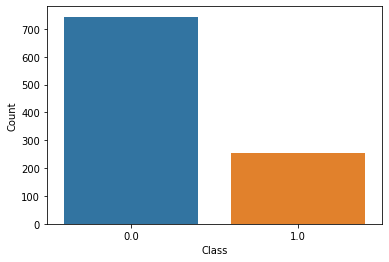

In [81]:
# Get the counts of the binary classes in the target variable
counts = data['churn'].value_counts()

# Create a bar plot
sns.barplot(x=counts.index, y=counts.values)

# Label the axes
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()


In [82]:
# Applying upsampling of the minority class
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

## Applying PCA after oversampling to reduce noise

In [83]:
from sklearn.decomposition import PCA

# Initialize PCA object
pca = PCA(n_components=0.95)

# Fit and transform data
X_reduced = pca.fit_transform(X)

**Models**
##Logistic Regression

Confusion Matrix:
[[145   6]
 [ 33  16]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       151
         1.0       0.73      0.33      0.45        49

    accuracy                           0.81       200
   macro avg       0.77      0.64      0.67       200
weighted avg       0.79      0.81      0.78       200

AUC-ROC: 0.6433977564535749


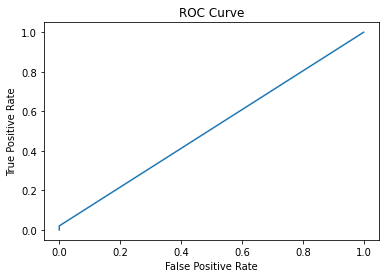

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# split the data into training and test sets
X = data.drop('churn', axis=1)
y = data['churn']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the model
logistic_regression = LogisticRegression()

# fit the model to the training data
logistic_regression.fit(X_train, y_train)

# make predictions on the test set
y_pred = logistic_regression.predict(X_test)

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Adaboost Algorithmn

Confusion Matrix:
[[145   6]
 [ 19  30]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       151
         1.0       0.83      0.61      0.71        49

    accuracy                           0.88       200
   macro avg       0.86      0.79      0.81       200
weighted avg       0.87      0.88      0.87       200

AUC-ROC: 0.7862548993107177


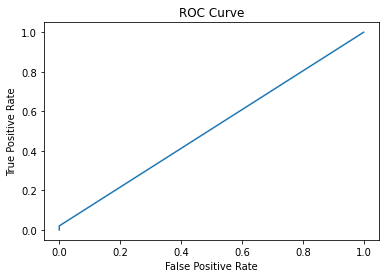

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

X = data.drop('churn', axis=1)
y = data['churn']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier
ada = AdaBoostClassifier()

# Train the classifier on the training data
ada.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ada.predict(X_test)

# Get the confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##Random Forest

Confusion Matrix:
[[147   4]
 [ 16  33]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       151
         1.0       0.89      0.67      0.77        49

    accuracy                           0.90       200
   macro avg       0.90      0.82      0.85       200
weighted avg       0.90      0.90      0.89       200

AUC-ROC: 0.8234896607649683


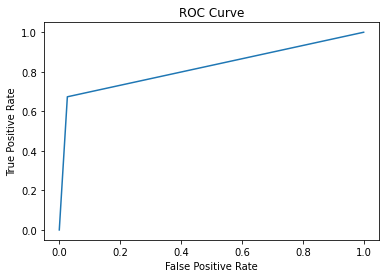

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and test sets
X = data.drop('churn', axis=1)
y = data['churn']


# Build the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()







##Decision Tree

Confusion Matrix:
[[134  17]
 [ 22  27]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       151
         1.0       0.61      0.55      0.58        49

    accuracy                           0.81       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.80      0.81      0.80       200

AUC-ROC: 0.7192188133531557


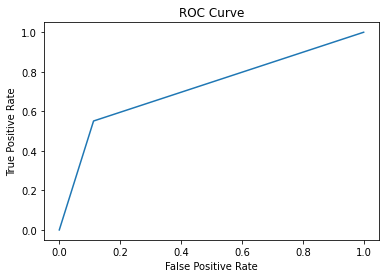

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Split data into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##Neural Network

Iteration 1, loss = 0.61099110
Iteration 2, loss = 0.58010085
Iteration 3, loss = 0.55250785
Iteration 4, loss = 0.53860269
Iteration 5, loss = 0.52412730
Iteration 6, loss = 0.51100286
Iteration 7, loss = 0.49899527
Iteration 8, loss = 0.48745994
Iteration 9, loss = 0.47891465
Iteration 10, loss = 0.47328213
Iteration 11, loss = 0.46404385
Iteration 12, loss = 0.45596536
Iteration 13, loss = 0.45162569
Iteration 14, loss = 0.44612329
Iteration 15, loss = 0.43894765
Iteration 16, loss = 0.43425464
Iteration 17, loss = 0.43087472
Iteration 18, loss = 0.43022670
Iteration 19, loss = 0.42266627
Iteration 20, loss = 0.41634784
Iteration 21, loss = 0.41339498
Iteration 22, loss = 0.41169959
Iteration 23, loss = 0.40888874
Iteration 24, loss = 0.40430453
Iteration 25, loss = 0.41589729
Iteration 26, loss = 0.39669447
Iteration 27, loss = 0.39107918
Iteration 28, loss = 0.38582280
Iteration 29, loss = 0.38735859
Iteration 30, loss = 0.39458473
Iteration 31, loss = 0.37583740
Iteration 32, los

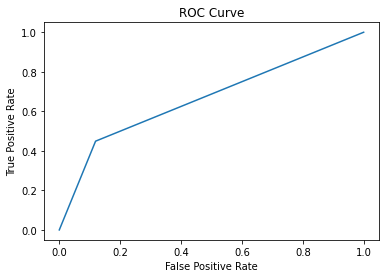

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
# Split data into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the neural network
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

# Train the neural network on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


##Naive Bayes Algorithm

Confusion Matrix:
[[97 54]
 [18 31]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.64      0.73       151
         1.0       0.36      0.63      0.46        49

    accuracy                           0.64       200
   macro avg       0.60      0.64      0.60       200
weighted avg       0.73      0.64      0.66       200

AUC-ROC: 0.6375185835923773


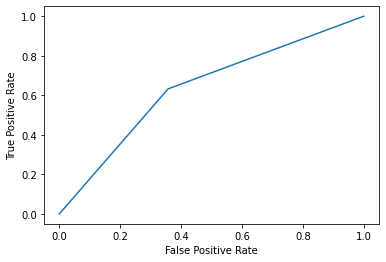

In [89]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Split data into features (X) and target (y)
X = data.drop('churn', axis=1)
y = data['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(cr)

auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


## Summary
The random forest model gives the best the best AUC-ROC value. This metric is well preferred because of the imbalance that still exist in the two classes of churn[0 and 1] even after sampling of the minority class